In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns; sns.set()
import utils as u
import numpy as np
from subprocess import call

plt.rcParams['figure.figsize'] = (10, 6)

## Experimentando con k-folds

La idea es agarrar un rango amplio pero poco granulado de alfa y knn y variar la cantidad de folds y medir accuracy promedio.

In [73]:
knn = [1,2,3,4,5,6,7,8,9,10,15,50]
alfas = [3,5,10,25,50]
kfolds = [2,3,4,5,7,10,15]
inp = 'catedra/testFullBig.in'

In [63]:
out = 'expFolds/method3/result_folds{}_alpha{}_k{}'

for nfold in kfolds:
    for k in knn:
        for a in alfas:
            call(['../src/main', '-m', '3', '-i', inp,'-o', out.format(nfold, a, k), '-knn-k', str(k), '-alpha', str(a), '-k-folds', str(nfold)])

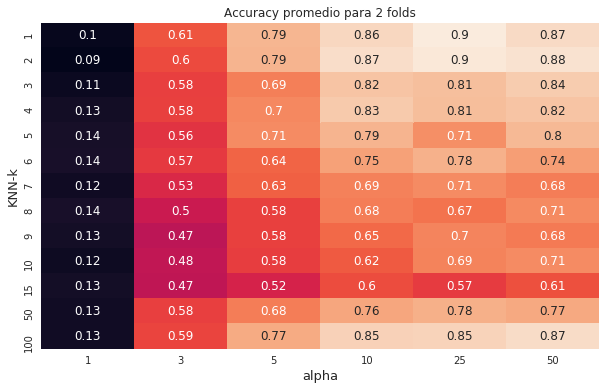

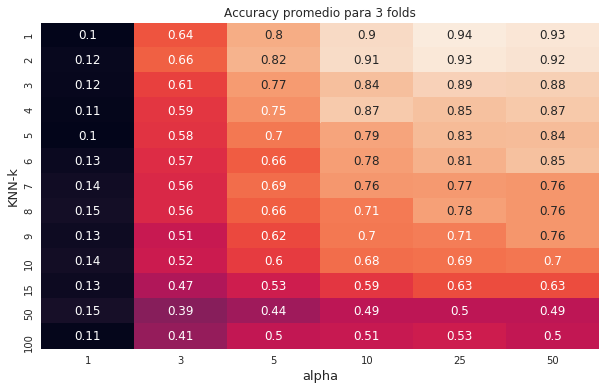

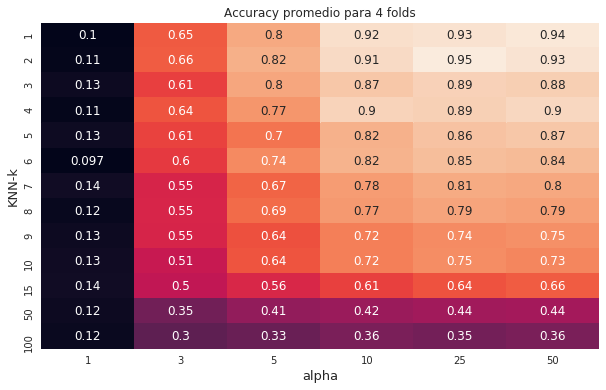

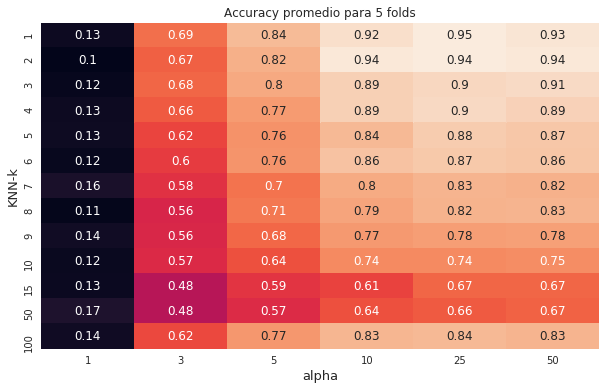

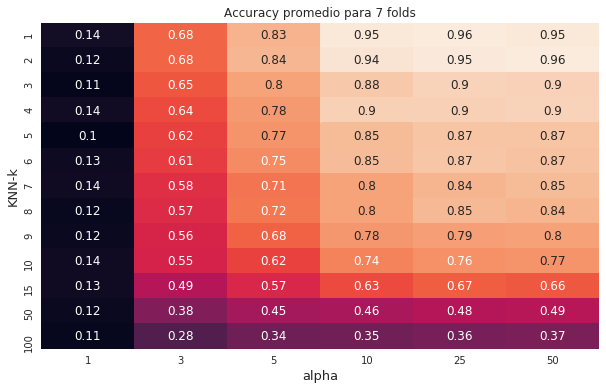

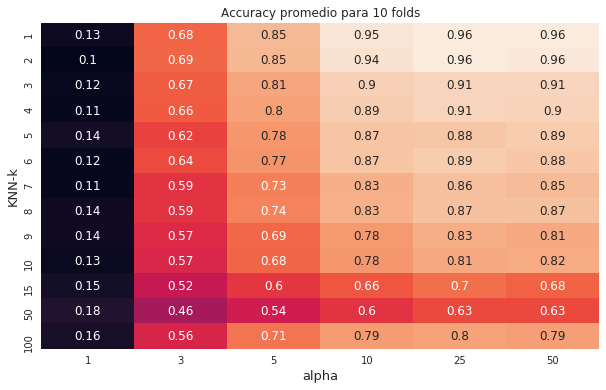

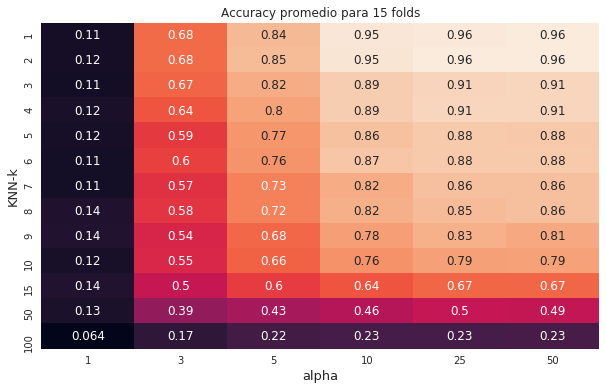

In [64]:
out = 'expFolds/method3/result_folds{}_alpha{}_k{}'

avg_accuracy = {}
for nfold in [2,3,4]:
    avg_accuracy[nfold] = []
    for k in knn:
        for -a in alfas:
            avg = u.loadStats(out.format(nfold, a, k))['acccuracy'].mean()
            avg_accuracy[nfold].append(avg)
            
    matrix = np.reshape(avg_accuracy[nfold], newshape=(len(knn),len(alfas)))
    ax = sns.heatmap(matrix, xticklabels=alfas, yticklabels=knn, annot=True, cbar=False)

    plt.xlabel('alpha', fontsize=13)
    plt.ylabel('KNN-k', fontsize=13)
    plt.title("Accuracy promedio para {} folds".format(nfold))
    plt.show()

In [75]:
out = 'expFolds/method3/result_nostrat_folds5_alpha{}_k{}'

for k in knn:
    for a in alfas:
        call(['../src/main', '-m', '3', '-strat', '0', '-i', inp,'-o', out.format(a, k), '-knn-k', str(k), '-alpha', str(a), '-k-folds', '5'])

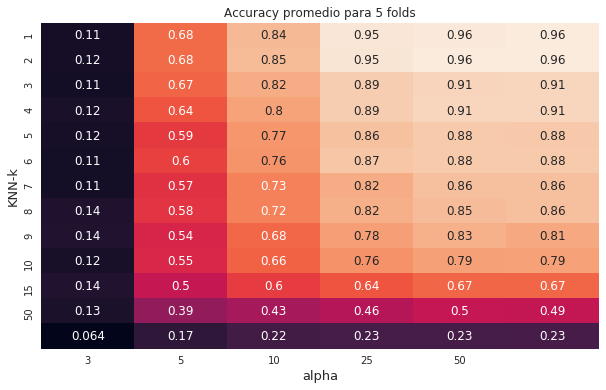

In [76]:
nostrat_avg_accuracy = []
for k in knn:
    for a in alfas:
        avg = u.loadStats(out.format(a, k))['accuracy'].mean()
        nostrat_avg_accuracy.append(avg)

sin_strat = np.reshape(nostrat_avg_accuracy, newshape=(len(knn),len(alfas)))
ax = sns.heatmap(matrix, xticklabels=alfas, yticklabels=knn, annot=True, cbar=False)

plt.xlabel('alpha', fontsize=13)
plt.ylabel('KNN-k', fontsize=13)
plt.title("Accuracy promedio para 5 folds")
plt.show()

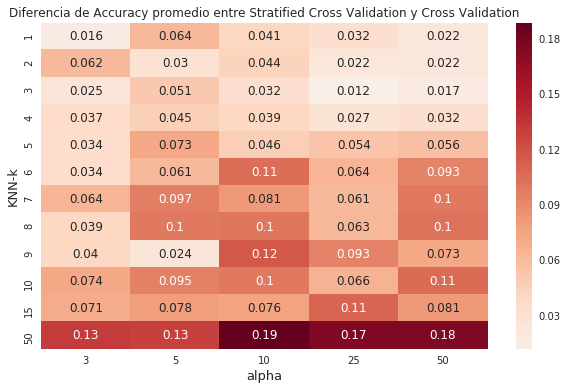

In [107]:
con_strat = np.reshape(avg_accuracy[nfold], newshape=(len(knn)+1,len(alfas)+1))

ax = sns.heatmap(con_strat[:-1, 1:] - sin_strat, xticklabels=alfas, yticklabels=knn, center=0, annot=True, cmap="RdBu_r")

plt.xlabel('alpha', fontsize=13)
plt.ylabel('KNN-k', fontsize=13)
plt.title("Diferencia de Accuracy promedio entre Stratified Cross Validation y Cross Validation")
plt.show()